# Statistical Power, and Analysis of Variance

In [1]:
# Overall Imports
import pandas as pd 
import numpy as np
np.random.seed(10)

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

# Statistical Power

At its core, the statistical power of a test is simply $1 - \beta$, where $\beta$ is the chance of making a Type II Error.

<img src="images/confusionmatrix.png" alt="type 1 and type 2 errors in a confusion matrix chart" width=600>

Statistical power captures the likelihood that you'll find what you're looking for - so it makes sense that you'll only run a test if there's a likelihood you'll find results. 

Statistical power can be calculated if you know three things:

- Significance level ($\alpha$, which you set)
- Effect size (the difference in distributions, which we'll go into in a second)
- Sample size (number of observations)


## Effect Size
Effect size is used to quantify the size of the difference between two groups under observation. Effect sizes are easy to calculate, understand and apply to any measured outcome and is applicable to a multitude of study domains. It is highly valuable towards quantifying the effectiveness of a particular intervention, relative to some comparison. Measuring effect size allows scientists to go beyond the obvious and simplistic, 'Does it work or not?' to the far more sophisticated, 'How well does it work in a range of contexts?'.

### Where does gender have a larger effect?

![gender effect size in seals vs pugs](images/gendereffectsize.png)

### Specifically, knowing the effect size helps you with:

- Communicate practical significance of results. An effect might be statistically significant, but does it matter in practical scenarios ?

- Effect size calculation and interpretation allows you to draw Meta-Analytical conclusions. This allows you to group together a number of existing studies, calculate the meta-analytic effect size and get the best estimate of the tur effect size of the population.

- Perform Power Analysis , which help determine the number of particicpants (sample size) that a study would require to achieve a certain probability of finding a true effect - if there is one.

### Example
Compare effect size of gender in height

In [3]:
# Mean height and sd for males
male_mean = 178
male_sd = 7.7

# Generate a normal distribution for male heights 
male_height = stats.norm(male_mean, male_sd)

# now for females
female_mean = 163
female_sd = 7.3
female_height = stats.norm(female_mean, female_sd)

In [4]:
def evaluate_PDF(rv, x=4):
    '''
    Input: a random variable object, standard deviation
    output : x and y values for the normal distribution
    '''
    
    # Identify the mean and standard deviation of random variable 
    mean = rv.mean()
    std = rv.std()

    # Use numpy to calculate evenly spaced numbers over the specified interval (4 sd) and generate 100 samples.
    xs = np.linspace(mean - x*std, mean + x*std, 100)
    
    # Calculate the peak of normal distribution i.e. probability density. 
    ys = rv.pdf(xs)

    return xs, ys # Return calculated values

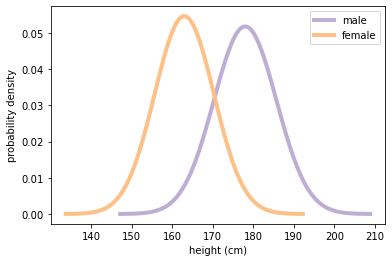

In [5]:
# Male height
mxs, mys = evaluate_PDF(male_height)
plt.plot(mxs, mys, label='male', linewidth=4, color='#beaed4') 

#Female height 
fxs, fys = evaluate_PDF(female_height)
plt.plot(fxs, fys, label='female', linewidth=4, color='#fdc086')

plt.xlabel('height (cm)')
plt.ylabel('probability density')
plt.legend()
plt.show()

### Cohen's $d$, standardized metric for effect size

Cohen’s $d$ is one of the most common ways to measure effect size. As an effect size, Cohen's d is typically used to represent the magnitude of differences between two (or more) groups on a given variable, with larger values representing a greater differentiation between the two groups on that variable.

$d$ = effect size (difference of means) / pooled standard deviation;

$d = \frac{\mu1 - \mu2}{\sigma pooled}$

The power is __not__ the same as $d$, but it is dependent on the expected t value,represented by $\delta$, calculated by:

$\delta = $d$\sqrt \frac{n}{2}$

We can then use the power table to find the power

In [6]:
def Cohen_d(group1, group2):
    '''
    Compute Cohen's d

    group1: Series or NumPy array
    group2: Series or NumPy array

    returns: float, for Cohen's d 
    '''

    diff = group1.mean() - group2.mean()

    n1 = len(group1)
    n2 = len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled variance
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2 - 2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [7]:
# grab 1000 random variables from each distribution
female_sample = female_height.rvs(1000)
male_sample = male_height.rvs(1000)

effect = Cohen_d(male_sample, female_sample)
print(effect)

2.066588116850072


#### Evaluating Effect Size

[good demo here](https://rpsychologist.com/d3/cohend/)

In general:

- Small effect = 0.2
- Medium Effect = 0.5
- Large Effect = 0.8

In [8]:
def plot_pdfs(cohen_d=2):
    """
    Plot PDFs for distributions that differ by some number of stds.
    
    cohen_d: number of standard deviations between the means
    """
    group1 = stats.norm(0, 1) # assume mean = 0 and std = 1
    group2 = stats.norm(cohen_d, 1)
    xs, ys = evaluate_PDF(group1)
    plt.fill_between(xs, ys, label='Female', color='#ff2289', alpha=0.7)

    xs, ys = evaluate_PDF(group2)
    plt.fill_between(xs, ys, label='Male', color='#376cb0', alpha=0.7)
    plt.legend()
    plt.show()

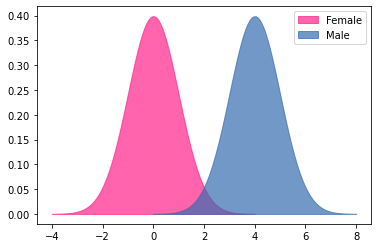

In [9]:
plot_pdfs(4)

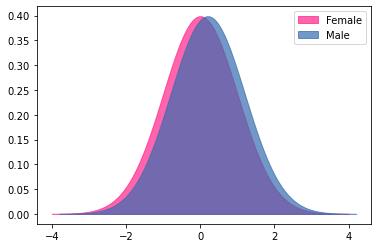

In [10]:
plot_pdfs(.2)

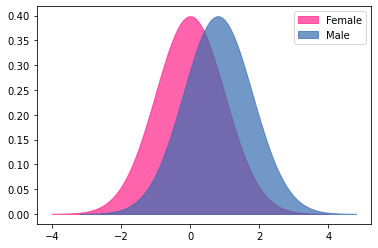

In [11]:
plot_pdfs(.8)

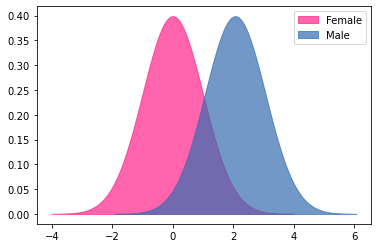

In [12]:
plot_pdfs(effect)

## Error

When conducting hypothesis testing, we __choose__ a value for alpha, which represents the margin of error we are allowing. Remember, alpha represents the probability in which we are allowed to take the risk of falsely rejecting the null hypothesis. By convention, we set the alpha at 0.05, which we can interpret as "for 5% of the time, we are willing to reject the null hypothesis when it is in fact true". How, then, do we categorize different types of error associated with conducting the experiments?

#### Type I error
Type I error is usually represented as $\alpha$, which is the probability of rejecting the null hypothesis when it is in fact true. 

For example, if we compare the height of males and females in a sample, with $\mu$m = 175cm, $\sigma$m = 4cm, and $\mu$f = 170 cm, $\sigma$f = 2.5cm, the __null hypothesis__ would be: there is no difference of heights in two genders. After conducting the appropriate statistical testing and attaining an alpha of .04, we conclude that there is a significant difference in gender. However, the reality is there is no difference. 

#### Type II Error
Type II error is represented as $\beta$, it is the probability of failing to reject the null when it is in fact false. Applying to our case above, we would have said that the two genders do not differ in heights when they in fact do.

## Tie it all back together

Elements that affect power:
- Effect Size
- Sample Size (and thus Standard Error)
- Alpha

How does sample size affect power?

In [13]:
# Well, let's find out!
from statsmodels.stats.power import TTestIndPower

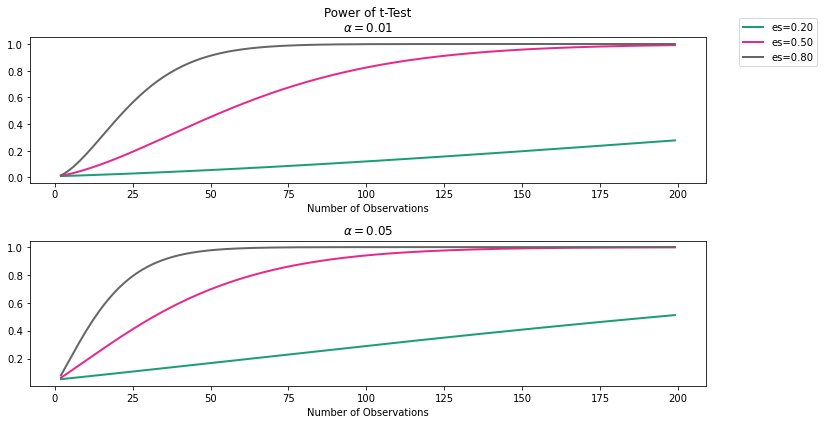

In [14]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.01,
                                 ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
ax.get_legend().remove()
ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$') 
plt.tight_layout()
plt.legend(loc=(1.05,2.2));

## Quick Case Study 

Suppose you are launching a pilot study with Instagram and you want to examine the new feature (making the heart when you "like" someone's photo red instead of white) developed by the frontend engineer attracted more likes __given__ other variables are being held constant. You have collected two datasets. 

In [15]:
experiment = pd.read_csv('data/ig_experiment.csv', index_col=0)
control = pd.read_csv('data/ig_control.csv', index_col=0)

### Look at the data

In [16]:
experiment.head()

,ID_Exp,Likes_Given_Exp,Avg_Likes_Given_Exp
0,1,47,50
1,2,54,54
2,3,52,59
3,4,54,45
4,5,45,55


In [17]:
control.head()

,ID_Con,Likes_Given_Con,Avg_Likes_Given_Con
0,1,59,50
1,2,50,52
2,3,55,53
3,4,52,52
4,5,59,52


#### Solve for sample size

We can use `power_analysis.solve_power` from `statsmodels` to find the sample size you need.

[documentation here](https://www.statsmodels.org/dev/generated/statsmodels.stats.power.tt_ind_solve_power.html)

In [18]:
effect_size = Cohen_d(control['Likes_Given_Con'], experiment['Likes_Given_Exp'])
effect_size

0.9781835664336842

In [19]:
# before we even start the experiment, we want to know in order to attain a power of .8 
# given an alpha of .05, how many observations we need 
alpha = 0.05 # significance level
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)
sample_size

17.42035101569396

------

# ANOVA 

ANOVA, short for **An**alysis **o**f **Va**riance, is a commonly used statistical method for comparing means using the calculated F-statistic of 3 groups or more.  

<center><img src='images/rsz_anova-800x444.jpg'>
    
Like all tests, we calculate a statistic (F-ratio or F-statistic) to get a p-value to compare with the critical value

## Let's look at an example

A company is wondering how they can best optimize the performance of their data scientists. They devise an experiment to test the effect of various substances on the quality of work completed by their data scientists. They come up with four groups:

      Group A:  Given 150mg of caffeine
      Group B:  Given 2 ounces of alcohol
      Group C:  Given 100g of chocolate
      Group D:  Given 10 ounces of water
After ingesting their given substance, each data scientist was then given the same assessment. After two hours, the accuracy of each data scientist's model was evaluated and recorded and the results are shown below. With a confidence level of 95%, is there a difference in performance across the groups?

In [20]:
A = [0.92, 0.89, 0.94, 0.91, 0.79, 0.90, 0.96, 0.94, 0.92, 0.85]
B = [0.65, 0.79, 0.99, 0.48, 0.54, 0.68, 0.52, 0.49, 0.52, 0.56]
C = [0.85, 0.89, 0.91, 0.92, 0.86, 0.82, 0.94, 0.90, 0.91, 0.95]
D = [0.69, 0.75, 0.85, 0.74, 0.76, 0.85, 0.78, 0.72, 0.84, 0.86]

In [21]:
f_stat,p_value = stats.f_oneway(A,B,C,D)
print('F-stat:',f_stat)
print('p-value:',p_value)

F-stat: 19.986414188904373
p-value: 8.500667468792516e-08


## What is the f-statistic? 

<img src='images/f-stat.png'>
    
The test statistic for ANOVA follows the F-distribution, a continuous probability function with 2 unique values, the degrees of freedom of groups and the degrees of freedom of all subjects. It is positively skewed and defined only for positive values. 

If, a = number of groups AND N = total number of subjects THEN 
    
- Degrees of freedom numerator = a - 1
- Degrees of freedom denominator = N - a

Text(0.5, 0, 'F-statistic')

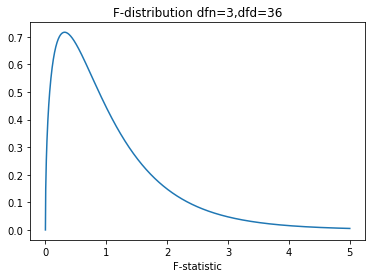

In [22]:
# here's one example
x = np.linspace(0,5,1000)
y = stats.f.pdf(x,3,36)
plt.plot(x,y)
plt.title('F-distribution dfn=3,dfd=36')
plt.xlabel('F-statistic')

Text(0.5, 0, 'F-statistic')

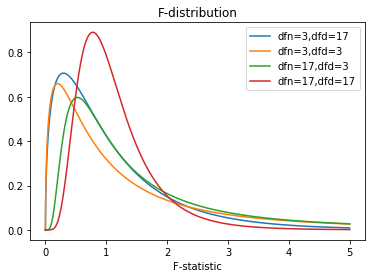

In [23]:
# Example of many f-distributions
x = np.linspace(0,5,1000)
y = stats.f.pdf(x,3,16)
plt.plot(x,y)
y = stats.f.pdf(x,3,3)
plt.plot(x,y)
y = stats.f.pdf(x,16,3)
plt.plot(x,y)
y = stats.f.pdf(x,16,16)
plt.plot(x,y)
plt.legend(['dfn=3,dfd=17','dfn=3,dfd=3','dfn=17,dfd=3','dfn=17,dfd=17'])
plt.title('F-distribution')
plt.xlabel('F-statistic')

### T-Test or ANOVA?

Suppose we want to compare whether multiple groups differ in some type of measures. For example, we have collected mood data grouped by four types of weather - sunny, raining, overcast, or snowy, and we want to find out whether there is a difference in mood across different weather. What tests would you use?

A natural reaction would be to conduct multiple t-tests. However, that comes with many drawbacks. First, you would need $\frac{n(n-1)}{2}$ t tests, which come out to 6 tests. Having more tests meaning you create a higher chance of making type I errors. In this case, our original probability of making type I error grew from 5% to 5% x 6 = 30%! By conduct 6 tests and comparing their mean to each other, we are running a huge risk of believing in false positives. 

How then, can we combat this? **ANOVA**!

Instead of looking at each individual difference, ANOVA examines the ratio of variance between groups, and variance within groups, and find out whether the ratio is big enough to be statistically significant. 

#### T-Test Statistics

## $$t = \frac{x\bar - \mu}{\frac{s}{\sqrt n}}$$

#### ANOVA - the F test

## $$F = \frac{MS_{between}}{MS_{within}}$$

We can also say that a t-test is a special case of ANOVA, in that we are comparing the means of only two groups.

In [24]:
data = pd.read_csv('data/bikeshare_day.csv')
data.head()
# cnt is the outcome we are trying to predict

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [25]:
# mapping the season names onto the data
seasons = {1: 'spring',
           2: 'summer',
           3: 'fall',
           4: 'winter'}
data['season_cat'] = data.season.map(seasons)

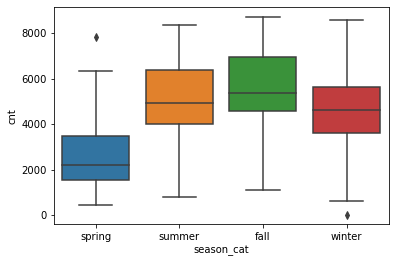

In [26]:
# boxplot
sns.boxplot(x='season_cat', y='cnt', data=data)
plt.show()

In [27]:
spring = data.loc[data['season'] == 1]['cnt']
summer = data.loc[data['season'] == 2]['cnt']
fall = data.loc[data['season'] == 3]['cnt']
winter = data.loc[data['season'] == 4]['cnt']

In [28]:
f_stat,p_value = stats.f_oneway(spring,summer,fall,winter)

In [29]:
print('F-stat:',f_stat)
print('p-value:',p_value)

F-stat: 128.76962156570784
p-value: 6.720391362913176e-67
